### Seattle Rain prediction

#### Import all libraries and dataset 

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
import warnings                   # supress warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('seattleWeather_1948-2017.csv') #load data

In [72]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [110]:
df.describe()

,PRCP,TMAX,TMIN,RAIN
count,25548.000000,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387,0.426648
std,0.239031,12.773265,8.893019,0.494600
min,0.000000,4.000000,0.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,103.000000,71.000000,1.000000


In [73]:
df.shape

(25551, 5)

In [74]:
df['RAIN'].value_counts()  

False    14648
True     10900
Name: RAIN, dtype: int64

#### Check for null values

In [75]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

There are very few null values so we can drop them.

In [77]:
df.dropna(inplace= True)

In [78]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

#### Visualize data

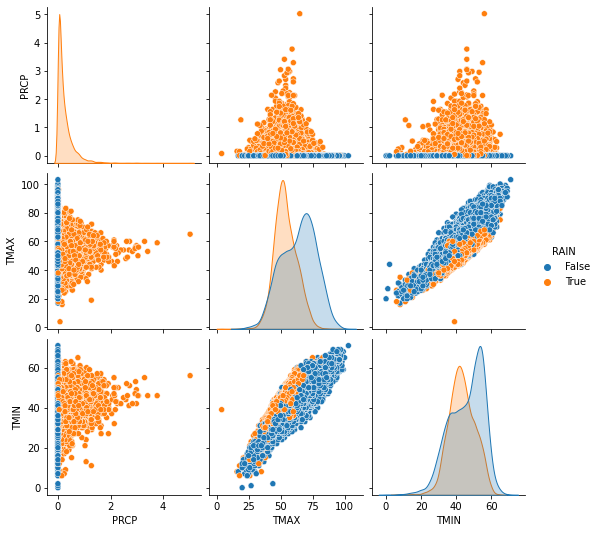

In [79]:
sns.pairplot(df, hue= "RAIN")

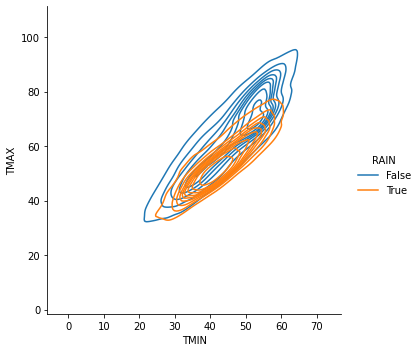

In [80]:
sns.displot(data=df, x='TMIN', y='TMAX', hue='RAIN', kind='kde')

#### Create dummy variables for output column

In [81]:
rain = pd.get_dummies(df['RAIN'], drop_first= True)

In [82]:
rain.head()

,True
0,1
1,1
2,1
3,1
4,1


In [83]:
df = df.drop('RAIN', 1)

In [84]:
df = pd.concat([df,rain], axis = 1)

In [85]:
df.head()

,DATE,PRCP,TMAX,TMIN,True
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


In [86]:
df.columns = ['DATE','PRCP','TMAX','TMIN' ,'RAIN']
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  uint8  
dtypes: float64(1), int64(2), object(1), uint8(1)
memory usage: 1022.9+ KB


#### Split data

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X = df.drop(['RAIN', 'DATE'], 1)
y = df['RAIN']

In [90]:
X.head(2)

,PRCP,TMAX,TMIN
0,0.47,51,42
1,0.59,45,36


In [91]:
y.head(2)

0    1
1    1
Name: RAIN, dtype: uint8

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)

#### Model building

#### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [94]:
log_model.fit(X_train, y_train)   # fit the model

LogisticRegression()

In [95]:
prediction_log = log_model.predict(X_test) # predict result

In [96]:
from sklearn.metrics import classification_report, accuracy_score

In [97]:
print(classification_report(y_test, prediction_log))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4420
           1       0.99      0.84      0.91      3245

    accuracy                           0.93      7665
   macro avg       0.94      0.92      0.93      7665
weighted avg       0.94      0.93      0.93      7665



In [98]:
print(accuracy_score(y_test, prediction_log)) 

0.9290280495759948


####  Decision tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

In [100]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [101]:
prediction_tree = tree_model.predict(X_test)

In [102]:
prediction_tree

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [103]:
print(classification_report(y_test, prediction_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4420
           1       1.00      1.00      1.00      3245

    accuracy                           1.00      7665
   macro avg       1.00      1.00      1.00      7665
weighted avg       1.00      1.00      1.00      7665



In [104]:
print(accuracy_score(y_test, prediction_tree))

1.0


#### Random forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [106]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
prediction_rf = rf_model.predict(X_test)

In [108]:
prediction_rf

array([1, 0, 0, ..., 1, 1, 0], dtype=uint8)

In [109]:
print(accuracy_score(y_test, prediction_rf))
print(classification_report(y_test, prediction_rf))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4420
           1       1.00      1.00      1.00      3245

    accuracy                           1.00      7665
   macro avg       1.00      1.00      1.00      7665
weighted avg       1.00      1.00      1.00      7665



#### Conclusion

The predictions made on the dataset is working pretty well and by using Decision tree and Random Forest we are getting very good results. Rainfall prediction plays important role for many sectors in any country.